In [1]:
import chainer
import chainer.links as L
import chainer.functions as F
import chainer.optimizers as opt
from chainer.dataset import concat_examples
from chainer.backends import cuda

import numpy as np
import math
from functools import partial

#from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

import models.VGG

# Model

In [2]:
#model = L.VGG16Layers()
#model.fc6 = L.Linear(512, 4096)
#model.fc8 = L.Linear(4096, len(classes))
#model.available_layers

#model = L.Classifier(models.VGG.VGG(len(classes)))
model = models.VGG.VGG()

gpu_id = 0  # Set to -1 if you use CPU
if gpu_id >= 0:
    model.to_gpu(gpu_id)

# Optimizer

In [3]:
optimizer = opt.MomentumSGD()
optimizer.setup(model)

# Cosine Annealing

In [4]:
def cosine_annealing(optimizer, start_lr, cur_steps, num_cycle):
    t_cur = cur_steps % num_cycle
    lr = 0.5 * start_lr * (math.cos(math.pi * t_cur / num_cycle) + 1)
    optimizer.lr = lr
    return lr

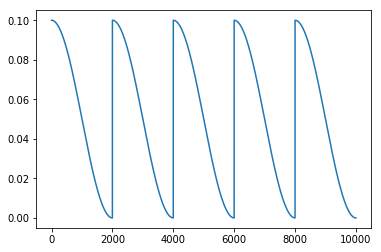

In [5]:
max_epochs = 10000
start_lr = 0.1
num_cycle = 2000
lr = []
for e in range(max_epochs):
    lr.append(cosine_annealing(optimizer, start_lr, e, num_cycle))
plt.plot(range(max_epochs), lr)